In [ ]:
import numpy as np
import pandas as pd
from janusx.pyBLUP.bayes import BAYES
vcfpath = '/Users/jingxianfu/Downloads/BGLR/wheat.vcf'
phenopath = '/Users/jingxianfu/Downloads/BGLR/wheat_Y.tsv'
mouse_test = pd.read_csv(phenopath,sep='\t',index_col=0).iloc[:,[1]].dropna()
idx_choice = np.random.choice(mouse_test.index,200,replace=False)
mouse_test.loc[idx_choice].to_csv('testset.tsv',sep='\t')
mouse_test.loc[idx_choice] = 'NA'
mouse_test.to_csv('trainset.tsv',sep='\t')

In [ ]:
import os
os.system(f'''source ~/.zshrc; conda activate jxfu; jx gs -vcf {vcfpath} -p /Users/jingxianfu/script/JanusX/test/trainset.tsv -GBLUP -BayesA -BayesB -BayesCpi -n 0 -o . -prefix test;\
source ~/.zshrc; conda activate rmvp; Rscript /Users/jingxianfu/script/bayes/bglr.test.r {vcfpath} /Users/jingxianfu/script/JanusX/test/trainset.tsv''')

In [ ]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from scipy.stats import pearsonr
# import numpy as np

# # === 1. 读取真实数据（真实表型）===
# true_df = pd.read_csv("testset.tsv", sep="\t", index_col=0, )
# true_df.index = true_df.index.astype(str)
# phenoname = true_df.columns[0]
# print(phenoname,end='\t')
# true_df.columns = ["y_true"]

# # === 2. 读取 JanusX GS 预测数据 ===
# janus_df = pd.read_csv(f"mouse_hs1940.{phenoname}.gs.tsv", sep="\t", index_col=0)
# janus_df.index = janus_df.index.astype(str)

# # === 3. 读取 BGLR 预测数据 ===
# bglr_df = pd.read_csv("test.tsv", sep="\t")
# bglr_df.index = bglr_df.index.astype(str)

# # 统一索引到 sample_id
# bglr_df = bglr_df.set_index("sample_id")

# # === 4. 只保留真实数据中存在的个体 ===
# common = true_df.index.intersection(janus_df.index)
# common = common.intersection(bglr_df.index)

# print("Number of overlapping samples:", len(common))

# true = true_df.loc[common, "y_true"]

# janus_pred = janus_df.loc[common]
# bglr_pred = bglr_df.loc[common]

# # === 5. 定义评估函数 ===
# def evaluate(pred, true):
#     pred = pred.astype(float)
#     true = true.astype(float)

#     # Pearson r
#     r, _ = pearsonr(true, pred)

#     # RMSE / MAE
#     rmse = np.sqrt(mean_squared_error(true, pred))
#     mae = mean_absolute_error(true, pred)

#     return r, rmse, mae

# # === 6. 对每个模型输出结果 ===
# print("\n=== JanusX GS Performance ===")
# for model in ["GBLUP", "BayesA", "BayesB", "BayesCpi"]:
#     r, rmse, mae = evaluate(janus_pred[model], true)
#     print(f"{model:8s}  r={r:.4f},  RMSE={rmse:.4f},  MAE={mae:.4f}")

# print("\n=== BGLR Performance ===")
# for model in ["bglr_BayesA", "bglr_BayesB", "bglr_BayesCpi_as_BayesC"]:
#     r, rmse, mae = evaluate(bglr_pred[model], true)
#     print(f"{model:20s}  r={r:.4f},  RMSE={rmse:.4f},  MAE={mae:.4f}")

In [ ]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from scipy.stats import pearsonr
# import numpy as np

# # === 1. 读取真实数据（真实表型）===
# true_df = pd.read_csv("testset.tsv", sep="\t", index_col=0, )
# true_df.index = true_df.index.astype(str)
# phenoname = true_df.columns[0]
# print(phenoname,end='\t')
# true_df.columns = ["y_true"]

# # === 2. 读取 JanusX GS 预测数据 ===
# janus_df = pd.read_csv(f"test.{phenoname}.gs.tsv", sep="\t", index_col=0)
# janus_df.index = janus_df.index.astype(str)

# # === 3. 读取 BGLR 预测数据 ===
# bglr_df = pd.read_csv("test.tsv", sep="\t")

# # 统一索引到 sample_id
# bglr_df = bglr_df.set_index("sample_id")
# bglr_df.index = bglr_df.index.astype(str)

# # === 4. 只保留真实数据中存在的个体 ===
# common = true_df.index.intersection(janus_df.index)
# common = common.intersection(bglr_df.index)
# print("Number of overlapping samples:", len(common))

# true = true_df.loc[common, "y_true"]
# janus_pred = janus_df.loc[common]
# bglr_pred = bglr_df.loc[common]

# # === 5. 定义评估函数（模型 vs 真实表型）===
# def evaluate(pred, true):
#     pred = pred.astype(float)
#     true = true.astype(float)

#     r, _ = pearsonr(true, pred)
#     rmse = np.sqrt(mean_squared_error(true, pred))
#     mae = mean_absolute_error(true, pred)
#     return r, rmse, mae

# print("\n=== JanusX GS vs True Phenotype ===")
# print("Model     \tPearson r\tRMSE    \tMAE")
# for model in ["GBLUP", "BayesA", "BayesB", "BayesCpi"]:
#     r, rmse, mae = evaluate(janus_pred[model], true)
#     print(f"{model:8s}\t{r: .4f}\t{rmse: .4f}\t{mae: .4f}")

# print("\n=== BGLR vs True Phenotype ===")
# print("Model                  \tPearson r\tRMSE    \tMAE")
# for model in ["bglr_BayesA", "bglr_BayesB", "bglr_BayesCpi_as_BayesC"]:
#     r, rmse, mae = evaluate(bglr_pred[model], true)
#     print(f"{model:22s}\t{r: .4f}\t{rmse: .4f}\t{mae: .4f}")

# # === 6. JanusX vs BGLR 预测值之间的相关性 ===
# print("\n=== Concordance between JanusX and BGLR predictions ===")
# pairs = [
#     ("BayesA",  "bglr_BayesA",            "BayesA  vs bglr_BayesA"),
#     ("BayesB",  "bglr_BayesB",            "BayesB  vs bglr_BayesB"),
#     ("BayesCpi","bglr_BayesCpi_as_BayesC","BayesC  vs bglr_BayesC"),
# ]

# print("Comparison              \tPearson r")
# for jx_col, bg_col, label in pairs:
#     r, _ = pearsonr(janus_pred[jx_col].astype(float),
#                     bglr_pred[bg_col].astype(float))
#     print(f"{label:24s}\t{r: .4f}")

In [ ]:
# import pandas as pd
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from scipy.stats import pearsonr
# import numpy as np

# # === 1. 读取真实数据（真实表型）===
# true_df = pd.read_csv("testset.tsv", sep="\t", index_col=0)
# true_df.index = true_df.index.astype(str)

# phenoname = true_df.columns[0]
# print(phenoname, end="\t")
# true_df = true_df.rename(columns={phenoname: "y_true"})

# # 如果你的文件名严格使用表型名，这里可选做“安全化”
# # phenoname_safe = phenoname.replace(" ", "_").replace("/", "_")
# phenoname_safe = phenoname

# # === 2. 读取 JanusX GS 预测数据 ===
# janus_df = pd.read_csv(f"test.{phenoname_safe}.gs.tsv", sep="\t", index_col=0)
# janus_df.index = janus_df.index.astype(str)

# # === 3. 读取 BGLR 预测数据 ===
# bglr_df = pd.read_csv("test.tsv", sep="\t").set_index("sample_id")
# bglr_df.index = bglr_df.index.astype(str)

# # === 4. 只保留真实数据中存在的个体 ===
# common = true_df.index.intersection(janus_df.index).intersection(bglr_df.index)
# print("Number of overlapping samples:", len(common))

# true = true_df.loc[common, "y_true"]
# janus_pred = janus_df.loc[common]
# bglr_pred = bglr_df.loc[common]

# def evaluate(pred, true):
#     pred = pd.to_numeric(pred, errors="coerce")
#     true = pd.to_numeric(true, errors="coerce")
#     m = pred.notna() & true.notna()
#     pred = pred[m].astype(float)
#     true = true[m].astype(float)

#     if len(true) < 3 or pred.std(ddof=0) == 0 or true.std(ddof=0) == 0:
#         return np.nan, np.nan, np.nan, len(true)

#     r, _ = pearsonr(true, pred)
#     rmse = np.sqrt(mean_squared_error(true, pred))
#     mae = mean_absolute_error(true, pred)
#     return r, rmse, mae, len(true)

# print("\n=== JanusX GS vs True Phenotype ===")
# print("Model     \tN\tPearsonr\tRMSE    \tMAE")
# for model in ["GBLUP", "BayesA", "BayesB", "BayesCpi"]:
#     r, rmse, mae, n = evaluate(janus_pred[model], true)
#     print(f"{model:8s}\t{n:d}\t{r: .4f}\t{rmse: .4f}\t{mae: .4f}")

# print("\n=== BGLR vs True Phenotype ===")
# print("Model                  \tN\tPearsonr\tRMSE    \tMAE")
# for model in ["bglr_BayesA", "bglr_BayesB", "bglr_BayesCpi_as_BayesC"]:
#     r, rmse, mae, n = evaluate(bglr_pred[model], true)
#     print(f"{model:22s}\t{n:d}\t{r: .4f}\t{rmse: .4f}\t{mae: .4f}")

# print("\n=== Concordance between JanusX and BGLR predictions ===")
# pairs = [
#     ("BayesA",   "bglr_BayesA",             "BayesA  vs bglr_BayesA"),
#     ("BayesB",   "bglr_BayesB",             "BayesB  vs bglr_BayesB"),
#     ("BayesCpi", "bglr_BayesCpi_as_BayesC", "BayesC  vs bglr_BayesC"),
# ]
# print("Comparison              \tN\tPearsonr")
# for jx_col, bg_col, label in pairs:
#     r, _, _, n = evaluate(janus_pred[jx_col], bglr_pred[bg_col])
#     print(f"{label:24s}\t{n:d}\t{r: .4f}")

In [24]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr

# ================================
# 1. 配置这两个路径（唯一需要修改的部分）
# ================================
vcfpath    = '/Users/jingxianfu/script/JanusX/example/mouse_hs1940.vcf.gz'
phenopath  = '/Users/jingxianfu/script/JanusX/example/mouse_hs1940.pheno'
JanusXlist = []
BGLRlist = []
GPlist = [('/Users/jingxianfu/script/JanusX/example/mouse_hs1940.vcf.gz','/Users/jingxianfu/script/JanusX/example/mouse_hs1940.pheno'),
 ('/Users/jingxianfu/Downloads/BGLR/wheat.vcf','/Users/jingxianfu/Downloads/BGLR/wheat_Y.tsv'),
 ('/Users/jingxianfu/Public/cubic.random.vcf.gz','/Users/jingxianfu/Public/PH.gtools.tsv')]
for vcfpath,phenopath in GPlist:
    # ================================
    # 2. 读取并构建 train / test
    # ================================
    mouse_test = pd.read_csv(phenopath, sep="\t", index_col=0).iloc[:, [0]].dropna()
    mouse_test.index = mouse_test.index.astype(str)

    trait_name = mouse_test.columns[0]

    # 随机选择 200 个测试样本
    idx_choice = np.random.choice(mouse_test.index, 200, replace=False)

    # 导出测试集
    test_df = mouse_test.loc[idx_choice]
    test_df.to_csv("testset.tsv", sep="\t")

    # 训练集：把测试样本设成 NA
    train_df = mouse_test.copy()
    train_df.loc[idx_choice] = pd.NA
    train_df.to_csv("trainset.tsv", sep="\t")

    print(f"Trait = {trait_name}, Total = {len(mouse_test)}, Test = 200")


    # ================================
    # 3. 调用 JanusX + BGLR
    # ================================
    cmd = f"""
    conda run -n jxfu jx gs -vcf {vcfpath} -p trainset.tsv -GBLUP -BayesA -BayesB -BayesCpi -n 0 -o . -prefix test >/dev/null 2>&1;
    conda run -n rmvp Rscript /Users/jingxianfu/script/bayes/bglr.test.r {vcfpath} trainset.tsv >/dev/null 2>&1;
    """
    os.system(cmd)


    # ================================
    # 4. 加载预测数据
    # ================================
    true_df = pd.read_csv("testset.tsv", sep="\t", index_col=0)
    true_df.index = true_df.index.astype(str)
    true_df.columns = ["y_true"]

    janus_df = pd.read_csv(f"test.{trait_name}.gs.tsv", sep="\t", index_col=0)
    janus_df.index = janus_df.index.astype(str)

    bglr_df = pd.read_csv("test.tsv", sep="\t").set_index("sample_id")
    bglr_df.index = bglr_df.index.astype(str)

    # 找到三者共有个体
    common = true_df.index.intersection(janus_df.index).intersection(bglr_df.index)
    true = true_df.loc[common, "y_true"]
    janus_pred = janus_df.loc[common]
    bglr_pred = bglr_df.loc[common]


    # ================================
    # 5. 评估函数
    # ================================
    def evaluate(pred, true):
        pred = pd.to_numeric(pred, errors="coerce")
        true = pd.to_numeric(true, errors="coerce")
        m = pred.notna() & true.notna()
        pred = pred[m]
        true = true[m]

        if len(true) < 3:
            return np.nan, np.nan, np.nan, len(true)
        r, _ = pearsonr(true, pred)
        rmse = np.sqrt(mean_squared_error(true, pred))
        mae = mean_absolute_error(true, pred)
        return r, rmse, mae, len(true)


    # ================================
    # 6. 输出结果
    # ================================
    print(f"Tool\tmethod\tpearsonr\trmse")
    for m in ["GBLUP", "BayesA", "BayesB", "BayesCpi"]:
        r, rmse, mae, n = evaluate(janus_pred[m], true)
        print(f"JanusX\t{m:8s}\t{r: .4f}\t{rmse:.4f}")

    mapping = {
        "bglr_BayesA": "BayesA",
        "bglr_BayesB": "BayesB",
        "bglr_BayesCpi_as_BayesC": "BayesCpi"
    }
    for col, name in mapping.items():
        r, rmse, mae, n = evaluate(bglr_pred[col], true)
        print(f"BGLR\t{name:8s}\t{r: .4f}\t{rmse:.4f}")

    print("\n=== JanusX vs BGLR 一致性（预测值相关性）===")
    for (jx, bg, name) in [
        ("BayesA", "bglr_BayesA", "BayesA"),
        ("BayesB", "bglr_BayesB", "BayesB"),
        ("BayesCpi", "bglr_BayesCpi_as_BayesC", "BayesC"),
    ]:
        r, _, _, n = evaluate(janus_pred[jx], bglr_pred[bg])
        JanusXlist.extend(janus_pred[jx])
        BGLRlist.extend(bglr_pred[bg])
        print(f"{name:8s} | N={n:4d} | r={r: .4f}")
    break

Trait = test0, Total = 1410, Test = 200
Tool	method	pearsonr	rmse
JanusX	GBLUP   	 0.7207	0.6316
JanusX	BayesA  	 0.7252	0.6348
JanusX	BayesB  	 0.7294	0.6264
JanusX	BayesCpi	 0.7240	0.6353
BGLR	BayesA  	 0.7177	0.6365
BGLR	BayesB  	 0.7076	0.6458
BGLR	BayesCpi	 0.6966	0.6552

=== JanusX vs BGLR 一致性（预测值相关性）===
BayesA   | N= 200 | r= 0.8357
BayesB   | N= 200 | r= 0.8350
BayesC   | N= 200 | r= 0.8416


In [1]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('mice1410.tsv',sep='\t')
df1['species'] = 'MouseC'
df2 = pd.read_csv('mice757.tsv',sep='\t')
df2['species'] = 'MouseD'
df3 = pd.read_csv('wheat599.tsv',sep='\t')
df3['species'] = 'Wheat'
df4 = pd.read_csv('maize1364.tsv',sep='\t')
df4['species'] = 'Maize'
dfc = pd.concat([df3,df4,df1,df2])
print(dfc)

      Tool    method  pearsonr    rmse species
0   JanusX     GBLUP    0.4648  0.8738   Wheat
1   JanusX    BayesA    0.4501  0.8809   Wheat
2   JanusX    BayesB    0.4223  0.8951   Wheat
3   JanusX  BayesCpi    0.4274  0.8933   Wheat
4     BGLR    BayesA    0.4716  0.8696   Wheat
..     ...       ...       ...     ...     ...
65  JanusX    BayesB    0.4327  0.4493  MouseD
66  JanusX  BayesCpi    0.4249  0.4507  MouseD
67    BGLR    BayesA    0.4115  0.4641  MouseD
68    BGLR    BayesB    0.4094  0.4547  MouseD
69    BGLR  BayesCpi    0.3974  0.4598  MouseD

[280 rows x 5 columns]


      Tool    method  pearsonr    rmse species
0   JanusX     GBLUP    0.4648  0.8738   Wheat
1   JanusX    BayesA    0.4501  0.8809   Wheat
2   JanusX    BayesB    0.4223  0.8951   Wheat
3   JanusX  BayesCpi    0.4274  0.8933   Wheat
4     BGLR    BayesA    0.4716  0.8696   Wheat
..     ...       ...       ...     ...     ...
30  JanusX    BayesB    0.4172  0.4526  MouseD
31  JanusX  BayesCpi    0.4238  0.4535  MouseD
32    BGLR    BayesA    0.3777  0.4737  MouseD
33    BGLR    BayesB    0.4401  0.4488  MouseD
34    BGLR  BayesCpi    0.4157  0.4535  MouseD

[105 rows x 5 columns]


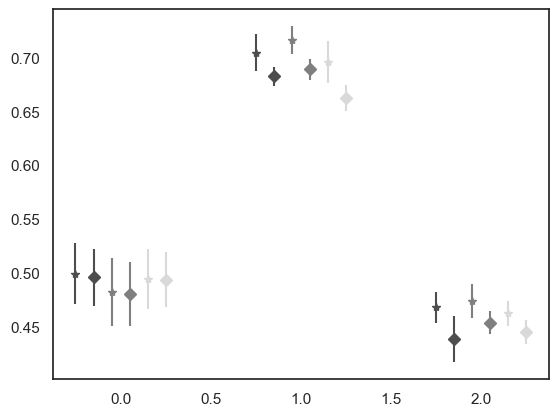

In [212]:
from matplotlib import pyplot as plt

colord = {'BayesA':'#4d4d4d','BayesB':"#7f7f7f",'BayesCpi':'#d9d9d9'}
for num1,species in enumerate(dfc['species'].unique()):
    for num2,method in enumerate(colord.keys()):
        dfc_sub:pd.DataFrame = dfc.loc[(dfc['species']==species)&(dfc['method']==method)]
        dfc_subJ = dfc_sub.loc[dfc_sub['Tool']=='JanusX']
        dfc_subB = dfc_sub.loc[dfc_sub['Tool']=='BGLR']
        plt.errorbar(x=num1-0.2+num2*0.2-0.05,y=dfc_subJ['pearsonr'].mean(),yerr=dfc_subJ['pearsonr'].sem(),
                    marker='*',color=colord[method])
        plt.errorbar(x=num1-0.2+num2*0.2+0.05,y=dfc_subB['pearsonr'].mean(),yerr=dfc_subB['pearsonr'].sem(),
                    marker='D',color=colord[method])
print(dfc)

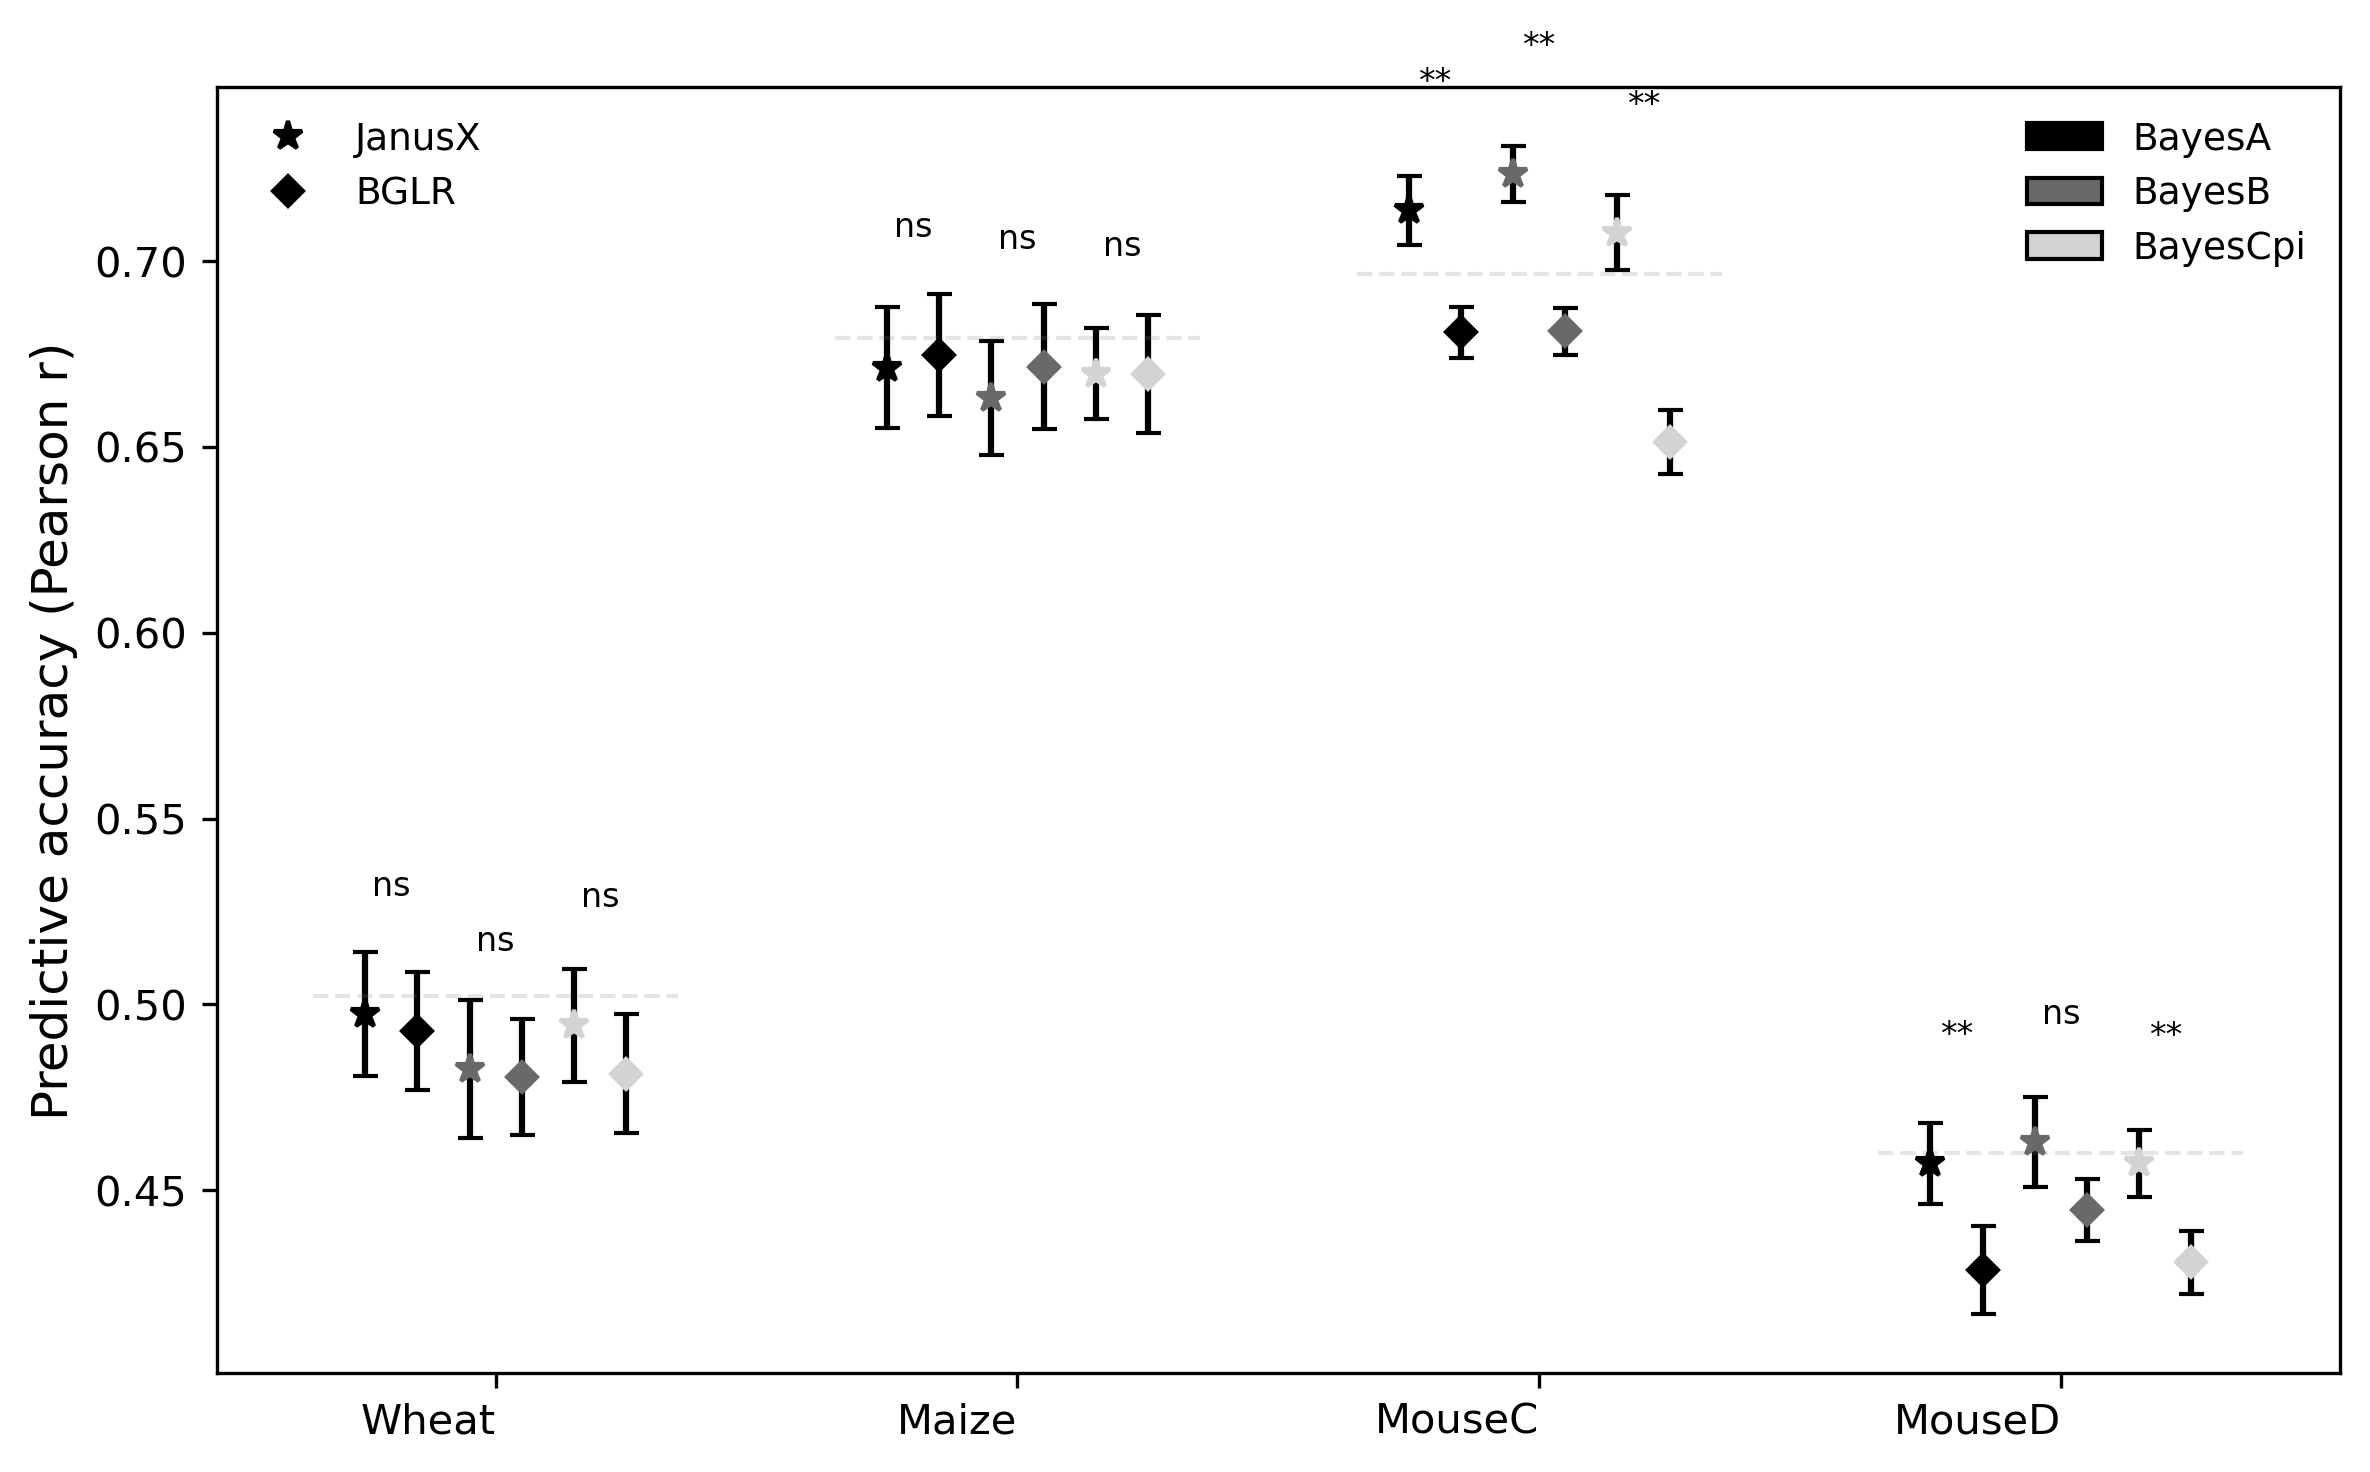

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.stats import ttest_rel   # ★ 加入配对 t 检验
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
# download the font files and save in this fold
mpl.rcParams['pdf.fonttype'] = 42

# 假设 dfc 已经存在，列包括:
# 'Tool' ∈ {'JanusX','BGLR'}
# 'method' ∈ {'BayesA','BayesB','BayesCpi'}
# 'pearsonr'
# 'species'

STYLE = {
    "JanusX": dict(color="black", marker="o", ls="-"),
    "GEMMA": dict(color="dimgray", marker="s", ls="--"),
    "GCTA":  dict(color="lightgray", marker="^", ls=":"),
}

# 1. 设定物种和方法顺序
species_order = list(dfc['species'].unique())   # 如需固定顺序，可手动写列表
method_order  = ['BayesA', 'BayesB', 'BayesCpi']

# 2. 灰度配色：同一种方法颜色一致，JanusX vs BGLR 用不同 marker 区分
colord = {'BayesA': 'black',   # 深灰
          'BayesB': 'dimgray',   # 中灰
          'BayesCpi': 'lightgray'} # 浅灰

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)

method_offsets = {'BayesA': -0.2, 'BayesB': 0.0, 'BayesCpi': 0.2}

# ========== 主循环：绘制 error bar + 统计检验 ==========
for num1, species in enumerate(species_order):
    for method in method_order:

        dfc_sub = dfc[(dfc['species'] == species) & (dfc['method'] == method)]
        if dfc_sub.empty:
            continue

        dfJ = dfc_sub[dfc_sub['Tool'] == 'JanusX']['pearsonr']
        dfB = dfc_sub[dfc_sub['Tool'] == 'BGLR']['pearsonr']

        # 位置
        x_base = num1 + method_offsets[method]

        # === 绘制 JanusX 点 ===
        if not dfJ.empty:
            ax.errorbar(x_base - 0.05, dfJ.mean(), yerr=dfJ.sem(),
                        fmt='*', capsize=3,
                        markersize=7, color=colord[method],ecolor='black')

        # === 绘制 BGLR 点 ===
        if not dfB.empty:
            ax.errorbar(x_base + 0.05, dfB.mean(), yerr=dfB.sem(),
                        fmt='D', capsize=3,
                        markersize=5, color=colord[method],ecolor='black')

        # === 显著性: JanusX vs BGLR（配对检验） ===
        stat, p = ttest_rel(dfJ.values, dfB.values)
        # === 显著性标记 ===
        if p < 0.01:
            sig = "**"
        elif p < 0.05:
            sig = "*"
        else:
            sig = "ns"

        # 标记放在两个点中间偏上位置
        y_max = max(dfJ.mean(), dfB.mean())
        ax.text(x_base, y_max + 0.03, sig,
                ha='center', va='bottom', fontsize=8, color='black')

    # === 添加 GBLUP 基准线（针对 JanusX 的 GBLUP 均值） ===
    df_gblup = dfc[(dfc['species'] == species) & 
                (dfc['method'] == 'GBLUP') &
                (dfc['Tool'] == 'JanusX')]

    if not df_gblup.empty:
        gblup_mean = df_gblup['pearsonr'].mean()
        ax.hlines(y=gblup_mean, xmin=num1-0.35, xmax=num1+0.35,
                colors='grey', linestyles='--', linewidth=1.0,
                alpha=0.2)

# ========== 坐标轴美化 ==========
ax.set_xticks(range(len(species_order)))
ax.set_xticklabels(species_order, ha='right')
ax.set_ylabel("Predictive accuracy (Pearson r)", fontsize=12)

# ===== 图例 =====
tool_handles = [
    Line2D([0], [0], marker='*', color='black', linestyle='', markersize=7, label='JanusX'),
    Line2D([0], [0], marker='D', color='black', linestyle='', markersize=5, label='BGLR'),
]
method_handles = [
    Patch(facecolor=colord[m], edgecolor='black', label=m) for m in method_order
]

legend1 = ax.legend(handles=tool_handles, loc='upper left',
                    frameon=False, fontsize=9, title_fontsize=9)
ax.add_artist(legend1)
ax.legend(handles=method_handles, loc='upper right',
          frameon=False, fontsize=9, title_fontsize=9)

plt.tight_layout()
plt.show()

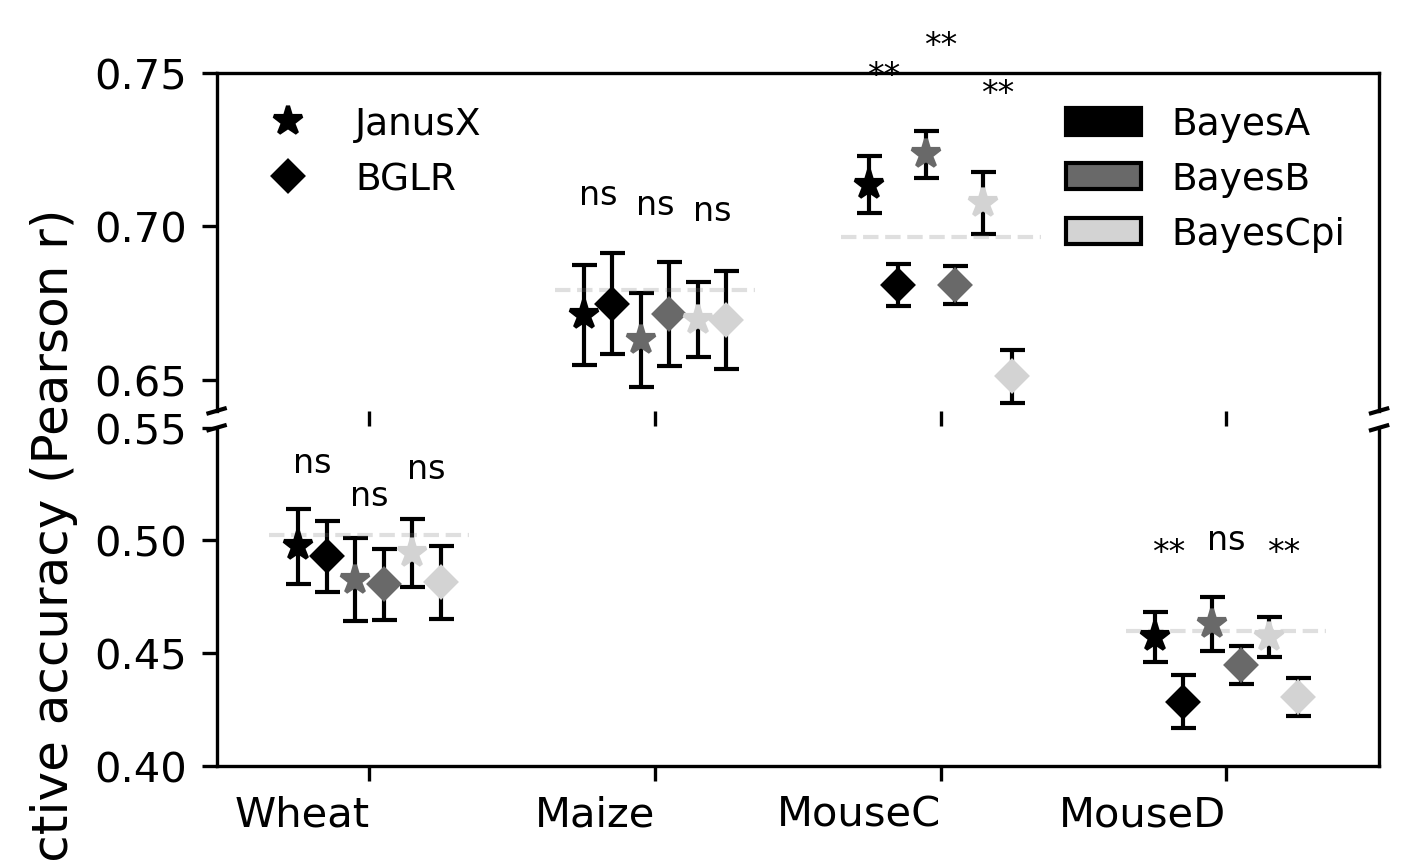

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.stats import ttest_rel
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# ===== 参数：断轴区间与显示上下界 =====
Y_LOW, Y_GAP_LOW, Y_GAP_HIGH, Y_HIGH = 0.40, 0.55, 0.64, 0.75

# 1) 设定物种和方法顺序
species_order = list(dfc['species'].unique())
method_order  = ['BayesA', 'BayesB', 'BayesCpi']
method_offsets = {'BayesA': -0.2, 'BayesB': 0.0, 'BayesCpi': 0.2}

# 2) 灰度配色
colord = {'BayesA': 'black', 'BayesB': 'dimgray', 'BayesCpi': 'lightgray'}

# ===== 创建断轴：上下两个子图，共享x =====
fig, (ax_top, ax_bot) = plt.subplots(
    2, 1, sharex=True, figsize=(5,3), dpi=300,
    gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.05}
)

# 设置 y 范围：上段、下段
ax_bot.set_ylim(Y_LOW, Y_GAP_LOW)
ax_top.set_ylim(Y_GAP_HIGH, Y_HIGH)

# 去掉连接处的脊线
ax_top.spines['bottom'].set_visible(False)
ax_bot.spines['top'].set_visible(False)
ax_top.tick_params(labeltop=False)   # 上图不显示顶端label
ax_bot.xaxis.tick_bottom()

# 断轴斜杠标记
d = 0.007  # 斜杠大小
kwargs = dict(transform=ax_top.transAxes, color='black', clip_on=False, linewidth=1)
ax_top.plot((-d, +d), (-d, +d), **kwargs)             # 左上
ax_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)       # 右上
kwargs.update(transform=ax_bot.transAxes)
ax_bot.plot((-d, +d), (1 - d, 1 + d), **kwargs)       # 左下
ax_bot.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) # 右下

# ===== 绘图函数：在两个轴都画一遍（自动被ylim裁剪）=====
def draw_errorbar(ax, x, y, yerr, fmt, color, ms):
    ax.errorbar(
        x, y, yerr=yerr,
        fmt=fmt, color=color, ecolor='black',
        capsize=3, elinewidth=1.0, markersize=ms
    )

# ========== 主循环 ==========
for num1, species in enumerate(species_order):
    for method in method_order:

        dfc_sub = dfc[(dfc['species'] == species) & (dfc['method'] == method)]
        if dfc_sub.empty:
            continue

        dfJ = dfc_sub[dfc_sub['Tool'] == 'JanusX']['pearsonr']
        dfB = dfc_sub[dfc_sub['Tool'] == 'BGLR']['pearsonr']

        x_base = num1 + method_offsets[method]

        # --- 点 + errorbar：画两次（上/下），由ylim裁剪 ---
        if not dfJ.empty:
            y, e = dfJ.mean(), dfJ.sem()
            draw_errorbar(ax_top, x_base - 0.05, y, e, '*', colord[method], 7)
            draw_errorbar(ax_bot, x_base - 0.05, y, e, '*', colord[method], 7)

        if not dfB.empty:
            y, e = dfB.mean(), dfB.sem()
            draw_errorbar(ax_top, x_base + 0.05, y, e, 'D', colord[method], 5)
            draw_errorbar(ax_bot, x_base + 0.05, y, e, 'D', colord[method], 5)

        # --- 显著性（配对t检验）---
        # 注意：确保长度一致且一一对应；若你前面已保证重复次数一致，这里OK
        stat, p = ttest_rel(dfJ.values, dfB.values)

        if p < 0.01:
            sig = "**"
        elif p < 0.05:
            sig = "*"
        else:
            sig = "ns"

        y_text = max(dfJ.mean(), dfB.mean()) + 0.03
        # 文本放在对应的那段轴上
        if y_text >= Y_GAP_HIGH:
            ax_top.text(x_base, y_text, sig, ha='center', va='bottom', fontsize=8, color='black')
        elif y_text <= Y_GAP_LOW:
            ax_bot.text(x_base, y_text, sig, ha='center', va='bottom', fontsize=8, color='black')
        # 如果刚好落在断轴空白里，就贴到下段顶端或上段底端
        else:
            ax_bot.text(x_base, Y_GAP_LOW - 0.005, sig, ha='center', va='top', fontsize=8, color='black')

    # --- 每物种 GBLUP 基准线（JanusX的GBLUP均值）---
    df_gblup = dfc[(dfc['species'] == species) &
                   (dfc['method'] == 'GBLUP') &
                   (dfc['Tool'] == 'JanusX')]

    if not df_gblup.empty:
        gblup_mean = df_gblup['pearsonr'].mean()
        for ax in (ax_top, ax_bot):
            ax.hlines(
                y=gblup_mean, xmin=num1 - 0.35, xmax=num1 + 0.35,
                colors='grey', linestyles='--', linewidth=1.0, alpha=0.25
            )

# ========== 坐标轴与图例 ==========
ax_bot.set_xticks(range(len(species_order)))
ax_bot.set_xticklabels(species_order, ha='right')
ax_bot.set_ylabel("Predictive accuracy (Pearson r)", fontsize=12)
ax_top.set_ylabel("")  # 上图不重复写

tool_handles = [
    Line2D([0], [0], marker='*', color='black', linestyle='', markersize=7, label='JanusX'),
    Line2D([0], [0], marker='D', color='black', linestyle='', markersize=5, label='BGLR'),
]
method_handles = [Patch(facecolor=colord[m], edgecolor='black', label=m) for m in method_order]

legend1 = ax_top.legend(handles=tool_handles, loc='upper left',
                        frameon=False, fontsize=9, title_fontsize=9)
ax_top.add_artist(legend1)
ax_top.legend(handles=method_handles, loc='upper right',
              frameon=False, fontsize=9, title_fontsize=9)

plt.savefig('fig3D.pdf',transparent=True)

In [10]:
from scipy.stats import chi2
print(chi2.sf(2*(1584.72-1583.93),df=1))

0.2087606934952403


In [2]:
import pandas as pd
import numpy as np
df =pd.read_csv('/Users/jingxianfu/script/JanusX/test/mouse_hs1940.test0.lmm.tsv',sep='\t')
np.corrcoef(df['pwald'],df['plrt'])

array([[1.        , 0.99999819],
       [0.99999819, 1.        ]])